# Tarefas de Classificação


## Estudo de caso: dados sobre o censo de 1994 dos EUA
Este dataset contém dados coletados pelo censo norte americano de 1994, contendo atributos sobre cada pessoa intrevistada, sendo que o último deles indica se a pessoa possuia renda maior ou menor do que $50.000,00 anuais.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('forestfires.csv')
df = df.drop(columns = ['X', 'Y'])
df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


### Separando os conjuntos de treino e teste

In [51]:
from sklearn.model_selection import train_test_split

# separando os conjuntos de dados de treino e teste
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

# separando a coluna alvo do conjunto de treino
df_treino_labels = df_treino['month'].copy()
df_treino        = df_treino.drop(columns='month')

# separando a coluna alvo do conjunto de teste
df_teste_labels = df_teste['month'].copy()
df_teste        = df_teste.drop(columns='month')

### Pré-processamento

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Atributos escolhidos:
nomes_atributos_numericos   = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
nomes_atributos_categoricos = ['day']

pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(),        nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

# pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)

In [53]:
# Coluna alvo para os conjuntos de treino e teste
y_treino = df_treino_labels.values
y_teste = df_teste_labels.values

In [54]:
y_treino

array(['sep', 'sep', 'aug', 'aug', 'feb', 'aug', 'sep', 'mar', 'mar',
       'sep', 'aug', 'mar', 'sep', 'sep', 'aug', 'feb', 'aug', 'sep',
       'oct', 'sep', 'aug', 'apr', 'aug', 'sep', 'sep', 'dec', 'aug',
       'aug', 'sep', 'aug', 'aug', 'aug', 'sep', 'jul', 'aug', 'feb',
       'mar', 'sep', 'sep', 'sep', 'aug', 'sep', 'jul', 'oct', 'sep',
       'aug', 'oct', 'aug', 'sep', 'jul', 'jul', 'aug', 'sep', 'sep',
       'aug', 'aug', 'jun', 'aug', 'aug', 'mar', 'sep', 'sep', 'mar',
       'jul', 'sep', 'mar', 'sep', 'aug', 'mar', 'mar', 'jul', 'aug',
       'sep', 'dec', 'jun', 'sep', 'aug', 'oct', 'mar', 'sep', 'oct',
       'aug', 'aug', 'mar', 'mar', 'aug', 'aug', 'aug', 'sep', 'aug',
       'jul', 'sep', 'aug', 'sep', 'aug', 'aug', 'aug', 'aug', 'sep',
       'sep', 'mar', 'aug', 'aug', 'sep', 'sep', 'aug', 'sep', 'aug',
       'aug', 'aug', 'jul', 'jul', 'aug', 'aug', 'sep', 'mar', 'sep',
       'sep', 'aug', 'sep', 'sep', 'aug', 'aug', 'aug', 'sep', 'apr',
       'aug', 'sep',

In [55]:
X_treino.shape

(413, 16)

In [56]:
y_treino.shape

(413,)

In [57]:
X_teste.shape

(104, 16)

In [58]:
y_teste.shape

(104,)

## Regressão Logística com SKLearn

In [59]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)

log_reg.fit(X_treino, y_treino)
log_reg.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

### Probabilidade estimada pela regressão logística

In [60]:
y_probabilidade_reglog = log_reg.predict_proba(X_teste)
np.round(y_probabilidade_reglog,decimals=2)

array([[0.08, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.91, 0.  , ..., 0.  , 0.  , 0.02],
       [0.  , 0.72, 0.  , ..., 0.  , 0.  , 0.19],
       ...,
       [0.  , 0.8 , 0.  , ..., 0.  , 0.  , 0.17],
       [0.  , 0.37, 0.  , ..., 0.  , 0.03, 0.45],
       [0.  , 0.06, 0.  , ..., 0.  , 0.  , 0.94]])

### Previsões pela regressão logística

In [61]:
y_previsto_reglog = log_reg.predict(X_teste)
y_previsto_reglog

array(['feb', 'aug', 'aug', 'sep', 'aug', 'mar', 'mar', 'sep', 'sep',
       'aug', 'sep', 'sep', 'aug', 'aug', 'sep', 'sep', 'aug', 'sep',
       'aug', 'aug', 'mar', 'aug', 'dec', 'sep', 'sep', 'aug', 'mar',
       'aug', 'sep', 'sep', 'aug', 'sep', 'sep', 'sep', 'mar', 'jul',
       'aug', 'sep', 'aug', 'sep', 'aug', 'sep', 'aug', 'aug', 'aug',
       'aug', 'mar', 'mar', 'sep', 'aug', 'aug', 'may', 'aug', 'sep',
       'aug', 'mar', 'oct', 'aug', 'sep', 'sep', 'aug', 'aug', 'aug',
       'aug', 'aug', 'sep', 'sep', 'aug', 'aug', 'mar', 'sep', 'sep',
       'aug', 'feb', 'mar', 'aug', 'aug', 'aug', 'aug', 'mar', 'feb',
       'sep', 'sep', 'mar', 'mar', 'feb', 'sep', 'sep', 'dec', 'sep',
       'aug', 'mar', 'oct', 'aug', 'aug', 'sep', 'mar', 'aug', 'aug',
       'aug', 'feb', 'aug', 'sep', 'sep'], dtype=object)

In [62]:
y_teste

array(['may', 'aug', 'aug', 'sep', 'aug', 'mar', 'mar', 'aug', 'sep',
       'aug', 'aug', 'sep', 'jul', 'aug', 'sep', 'sep', 'aug', 'sep',
       'aug', 'aug', 'mar', 'sep', 'dec', 'sep', 'sep', 'aug', 'feb',
       'aug', 'sep', 'sep', 'aug', 'sep', 'sep', 'sep', 'mar', 'jun',
       'aug', 'sep', 'aug', 'aug', 'aug', 'sep', 'aug', 'sep', 'aug',
       'jun', 'mar', 'apr', 'sep', 'jul', 'aug', 'sep', 'aug', 'aug',
       'aug', 'mar', 'oct', 'jul', 'sep', 'sep', 'aug', 'aug', 'aug',
       'aug', 'aug', 'sep', 'sep', 'aug', 'aug', 'mar', 'sep', 'sep',
       'jun', 'jan', 'jun', 'aug', 'aug', 'aug', 'aug', 'mar', 'apr',
       'sep', 'aug', 'mar', 'mar', 'feb', 'sep', 'sep', 'dec', 'sep',
       'aug', 'mar', 'oct', 'aug', 'aug', 'aug', 'mar', 'aug', 'aug',
       'aug', 'dec', 'aug', 'aug', 'sep'], dtype=object)

### Acurácia pela regressão logística

In [63]:
y_teste, y_teste.shape

(array(['may', 'aug', 'aug', 'sep', 'aug', 'mar', 'mar', 'aug', 'sep',
        'aug', 'aug', 'sep', 'jul', 'aug', 'sep', 'sep', 'aug', 'sep',
        'aug', 'aug', 'mar', 'sep', 'dec', 'sep', 'sep', 'aug', 'feb',
        'aug', 'sep', 'sep', 'aug', 'sep', 'sep', 'sep', 'mar', 'jun',
        'aug', 'sep', 'aug', 'aug', 'aug', 'sep', 'aug', 'sep', 'aug',
        'jun', 'mar', 'apr', 'sep', 'jul', 'aug', 'sep', 'aug', 'aug',
        'aug', 'mar', 'oct', 'jul', 'sep', 'sep', 'aug', 'aug', 'aug',
        'aug', 'aug', 'sep', 'sep', 'aug', 'aug', 'mar', 'sep', 'sep',
        'jun', 'jan', 'jun', 'aug', 'aug', 'aug', 'aug', 'mar', 'apr',
        'sep', 'aug', 'mar', 'mar', 'feb', 'sep', 'sep', 'dec', 'sep',
        'aug', 'mar', 'oct', 'aug', 'aug', 'aug', 'mar', 'aug', 'aug',
        'aug', 'dec', 'aug', 'aug', 'sep'], dtype=object),
 (104,))

In [64]:
acertos_reglog = y_previsto_reglog == y_teste
acertos_reglog

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False,  True])

In [65]:
valores_reglog, quantidades_reglog = np.unique(acertos_reglog, return_counts=True)
print(np.asarray((valores_reglog, quantidades_reglog)))

[[ 0  1]
 [23 81]]


In [66]:
print("Acurácia: ", quantidades_reglog[1]/y_teste.shape[0])

Acurácia:  0.7788461538461539


## Árvore de Decisão  com SKLearn

In [67]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(max_depth=2)
arvore.fit(X_treino, y_treino)
arvore.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

### Probabilidade estimada pela árvore de decisão

In [68]:
y_probabilidade_arvore = arvore.predict_proba(X_teste)
np.round(y_probabilidade_arvore,decimals=2)

array([[0.06, 0.03, 0.05, ..., 0.01, 0.  , 0.  ],
       [0.  , 0.79, 0.  , ..., 0.  , 0.  , 0.2 ],
       [0.  , 0.79, 0.  , ..., 0.  , 0.  , 0.2 ],
       ...,
       [0.  , 0.79, 0.  , ..., 0.  , 0.  , 0.2 ],
       [0.  , 0.92, 0.  , ..., 0.  , 0.02, 0.01],
       [0.  , 0.01, 0.  , ..., 0.  , 0.08, 0.92]])

### Previsões pela árvore de decisão

In [69]:
y_previsto_arvore = arvore.predict(X_teste)
y_previsto_arvore

array(['mar', 'aug', 'aug', 'sep', 'sep', 'mar', 'mar', 'aug', 'sep',
       'aug', 'aug', 'sep', 'mar', 'aug', 'sep', 'sep', 'aug', 'sep',
       'aug', 'aug', 'mar', 'sep', 'mar', 'sep', 'sep', 'aug', 'mar',
       'aug', 'sep', 'sep', 'aug', 'sep', 'sep', 'sep', 'mar', 'mar',
       'aug', 'sep', 'aug', 'aug', 'aug', 'sep', 'aug', 'sep', 'aug',
       'mar', 'mar', 'mar', 'sep', 'mar', 'aug', 'sep', 'aug', 'aug',
       'sep', 'mar', 'sep', 'mar', 'sep', 'sep', 'aug', 'aug', 'aug',
       'aug', 'aug', 'sep', 'sep', 'aug', 'aug', 'mar', 'sep', 'sep',
       'mar', 'mar', 'mar', 'aug', 'aug', 'aug', 'aug', 'mar', 'mar',
       'sep', 'aug', 'mar', 'mar', 'mar', 'sep', 'sep', 'mar', 'sep',
       'aug', 'mar', 'sep', 'aug', 'aug', 'aug', 'mar', 'aug', 'aug',
       'aug', 'mar', 'aug', 'aug', 'sep'], dtype=object)

In [70]:
acertos_arvore = y_previsto_arvore == y_teste
acertos_arvore

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [71]:
valores_arvore, quantidades_arvore = np.unique(acertos_arvore, return_counts=True)
print(np.asarray((valores_arvore, quantidades_arvore)))

[[ 0  1]
 [20 84]]


### Acurácia pela árvore de decisão

In [72]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_teste,y_previsto_arvore))

Acurácia:  0.8076923076923077


### Visualização da árvore de decisão

In [73]:
nomes_atributos = np.append( nomes_atributos_numericos, 
                             preproc_completo.named_transformers_['categoricos'].get_feature_names())

[Text(669.6, 543.6, 'DC <= 0.472\ngini = 0.747\nsamples = 100.0%\nvalue = [0.017, 0.339, 0.015, 0.044, 0.002, 0.07, 0.031, 0.102\n0.002, 0.002, 0.031, 0.344]\nclass = sep'),
 Text(334.8, 326.16, 'DC <= -0.289\ngini = 0.737\nsamples = 52.1%\nvalue = [0.033, 0.442, 0.028, 0.084, 0.005, 0.13, 0.06, 0.195\n0.005, 0.005, 0.009, 0.005]\nclass = aug'),
 Text(167.4, 108.72000000000003, 'gini = 0.782\nsamples = 27.8%\nvalue = [0.061, 0.026, 0.052, 0.157, 0.009, 0.2, 0.113, 0.365\n0.009, 0.009, 0.0, 0.0]\nclass = mar'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.151\nsamples = 24.2%\nvalue = [0.0, 0.92, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0\n0.02, 0.01]\nclass = aug'),
 Text(1004.4000000000001, 326.16, 'DMC <= 0.67\ngini = 0.438\nsamples = 47.9%\nvalue = [0.0, 0.227, 0.0, 0.0, 0.0, 0.005, 0.0, 0.0, 0.0, 0.0\n0.056, 0.712]\nclass = sep'),
 Text(837.0, 108.72000000000003, 'gini = 0.156\nsamples = 34.4%\nvalue = [0.0, 0.007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.077, 0.915]\nclas

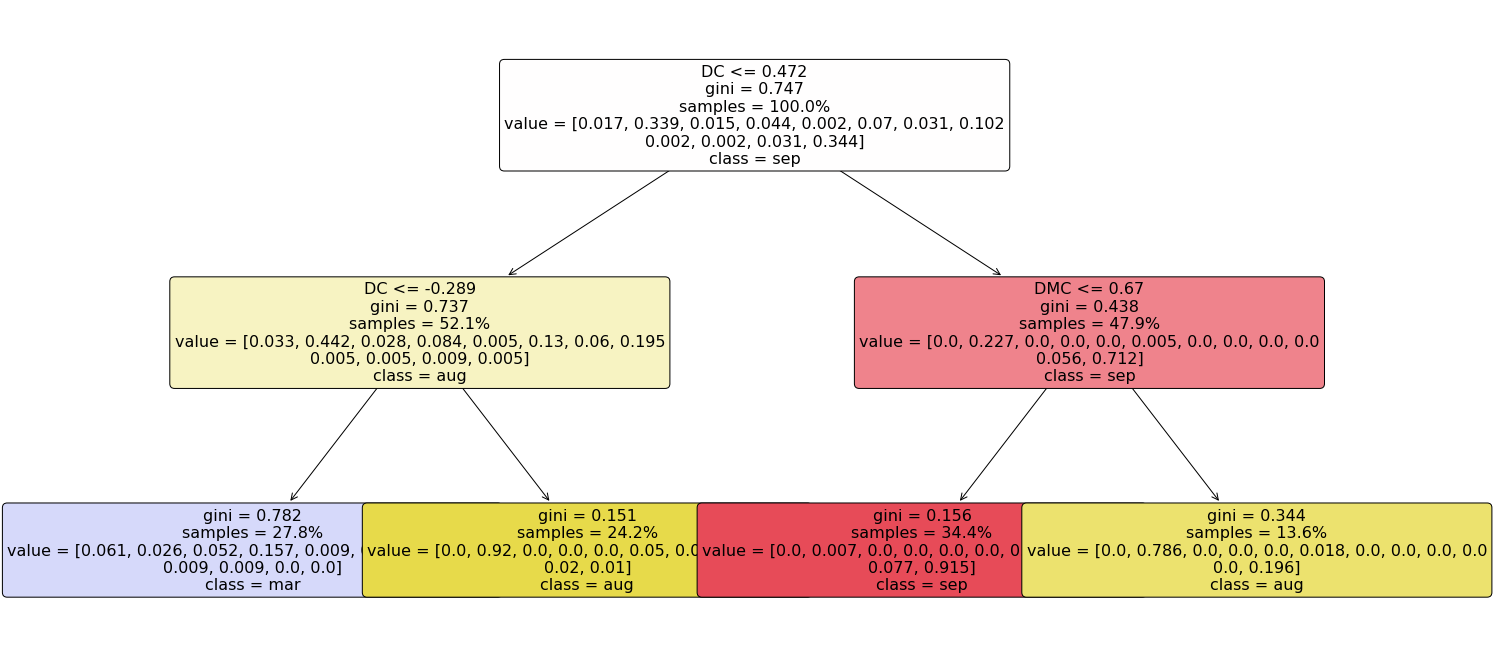

In [74]:
from sklearn import tree

plt.figure(figsize=(24,12))

tree.plot_tree(arvore,
               feature_names=nomes_atributos,
               class_names=arvore.classes_,
               rounded=True,
               filled=True,
               proportion=True,
               fontsize=16)

## Árvore de decisão sem pré-processamento dos atributos numéricos
Eliminaremos o pre-processamento dos atributos numéricos, mas manteremos o pré-processsamento dos atributos categóricos. A implementação do SKLearn não suporta atributos categóricos. 

In [75]:
preproc_completo_2 = ColumnTransformer([
    ('numericos',   'passthrough',    nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(),  nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

# pre-processamento do conjunto de treino
X_treino_tree = preproc_completo_2.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste_tree = preproc_completo_2.transform(df_teste)

In [76]:
arvore_2 = DecisionTreeClassifier(max_depth=2)
arvore_2.fit(X_treino_tree, y_treino)
arvore_2.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [77]:
y_probabilidade_arvore_2 = arvore_2.predict_proba(X_teste_tree)
np.round(y_probabilidade_arvore_2,decimals=2)

array([[0.06, 0.03, 0.05, ..., 0.01, 0.  , 0.  ],
       [0.  , 0.79, 0.  , ..., 0.  , 0.  , 0.2 ],
       [0.  , 0.79, 0.  , ..., 0.  , 0.  , 0.2 ],
       ...,
       [0.  , 0.79, 0.  , ..., 0.  , 0.  , 0.2 ],
       [0.  , 0.92, 0.  , ..., 0.  , 0.02, 0.01],
       [0.  , 0.01, 0.  , ..., 0.  , 0.08, 0.92]])

In [78]:
y_previsto_arvore_2 = arvore_2.predict(X_teste_tree)
y_previsto_arvore_2

array(['mar', 'aug', 'aug', 'sep', 'sep', 'mar', 'mar', 'aug', 'sep',
       'aug', 'aug', 'sep', 'mar', 'aug', 'sep', 'sep', 'aug', 'sep',
       'aug', 'aug', 'mar', 'sep', 'mar', 'sep', 'sep', 'aug', 'mar',
       'aug', 'sep', 'sep', 'aug', 'sep', 'sep', 'sep', 'mar', 'mar',
       'aug', 'sep', 'aug', 'aug', 'aug', 'sep', 'aug', 'sep', 'aug',
       'mar', 'mar', 'mar', 'sep', 'mar', 'aug', 'sep', 'aug', 'aug',
       'sep', 'mar', 'sep', 'mar', 'sep', 'sep', 'aug', 'aug', 'aug',
       'aug', 'aug', 'sep', 'sep', 'aug', 'aug', 'mar', 'sep', 'sep',
       'mar', 'mar', 'mar', 'aug', 'aug', 'aug', 'aug', 'mar', 'mar',
       'sep', 'aug', 'mar', 'mar', 'mar', 'sep', 'sep', 'mar', 'sep',
       'aug', 'mar', 'sep', 'aug', 'aug', 'aug', 'mar', 'aug', 'aug',
       'aug', 'mar', 'aug', 'aug', 'sep'], dtype=object)

In [79]:
acertos_arvore_2 = y_previsto_arvore_2 == y_teste
acertos_arvore_2

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [80]:
valores_arvore_2, quantidades_arvore_2 = np.unique(acertos_arvore_2, return_counts=True)
print(np.asarray((valores_arvore_2, quantidades_arvore_2)))

[[ 0  1]
 [20 84]]


In [81]:
print("Acurácia: ", accuracy_score(y_teste,y_previsto_arvore_2))

Acurácia:  0.8076923076923077


[Text(669.6, 543.6, 'DC <= 667.35\ngini = 0.747\nsamples = 100.0%\nvalue = [0.017, 0.339, 0.015, 0.044, 0.002, 0.07, 0.031, 0.102\n0.002, 0.002, 0.031, 0.344]\nclass = sep'),
 Text(334.8, 326.16, 'DC <= 477.85\ngini = 0.737\nsamples = 52.1%\nvalue = [0.033, 0.442, 0.028, 0.084, 0.005, 0.13, 0.06, 0.195\n0.005, 0.005, 0.009, 0.005]\nclass = aug'),
 Text(167.4, 108.72000000000003, 'gini = 0.782\nsamples = 27.8%\nvalue = [0.061, 0.026, 0.052, 0.157, 0.009, 0.2, 0.113, 0.365\n0.009, 0.009, 0.0, 0.0]\nclass = mar'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.151\nsamples = 24.2%\nvalue = [0.0, 0.92, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0\n0.02, 0.01]\nclass = aug'),
 Text(1004.4000000000001, 326.16, 'DMC <= 156.25\ngini = 0.438\nsamples = 47.9%\nvalue = [0.0, 0.227, 0.0, 0.0, 0.0, 0.005, 0.0, 0.0, 0.0, 0.0\n0.056, 0.712]\nclass = sep'),
 Text(837.0, 108.72000000000003, 'gini = 0.156\nsamples = 34.4%\nvalue = [0.0, 0.007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.077, 0.915]\nc

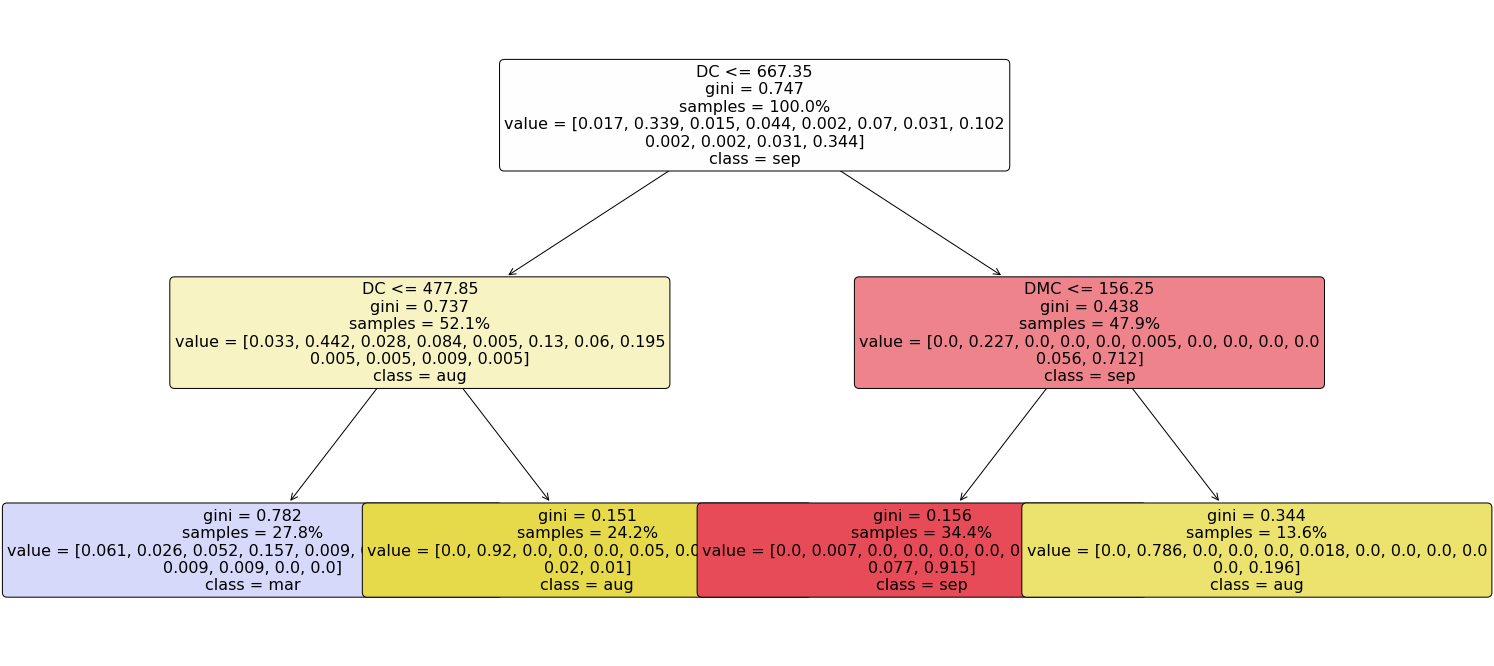

In [82]:
plt.figure(figsize=(24,12))
tree.plot_tree(arvore_2,
               feature_names=nomes_atributos,
               class_names=arvore_2.classes_,
               rounded=True,
               filled=True,
               proportion=True,
               fontsize=16)